
# F21DL: Data Mining & Machine Learning Coursework
## Dataset used: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)


### Setup

In [17]:
# Need Python >= 3.5 for some libraries

import sys
assert sys.version_info >= (3,5)

In [18]:
# Import common packages

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

### Import Data

In [19]:
df = pd.read_csv("winequality-white.csv", sep=";")

### Inspect Data

In [20]:
#Inspect first 5 rows

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
#Some statistics for each coloumn

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Observation
1. There are no missing values in any of the columns.
2. Every column except ***quality*** is measured in a continous scale and hence represented by floats.
3. Quality is the only column represented by integers because it only has values ranging from 0 to 10.
4. Quality is the target class that we will be trying to classify in this notebook.

In [30]:
# See unique values for Quality column.

df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [37]:
# See unique values for Quality column as percentages.

df.quality.value_counts(normalize=True).apply(lambda x: x * 100)

6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: quality, dtype: float64

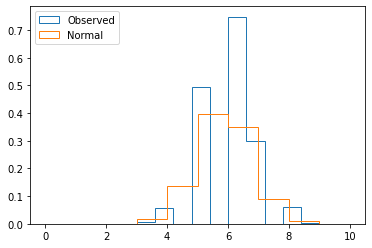

In [48]:
# Histogram for Quality and Normal Distribution having same mean and sd as Quality.

# Quality
ql = df.quality.to_numpy()
plt.hist(ql, density=True, histtype="step", label="Observed")

# Normal
similar_normal_dist = np.random.normal(ql.mean(),ql.std(),ql.size)
plt.hist(similar_normal_dist, range=(0,10), histtype="step", label="Normal", density=True)

plt.legend(loc=0)
plt.show()

#### Observations (Observed)
1. Unimodal.
2. Very poor and high quality wines are outliers.
3. Data looks almost symmetric though.
4. **<font color="red"> Observed distribution is not very similar to Normal, is logistic regression still appropriate here? </font>**


In [ ]:
fig = px.box(df, x="quality")
fig.show()

In [ ]:
#Statistical Summary

df.describe()

In [ ]:
#Histograms

df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Correlation 

corr_matrix = df.corr()

In [ ]:
# Pairwise correlation for all columns

print(corr_matrix)

In [ ]:
# Correlation for just the alcohol series

corr_matrix.alcohol.sort_values(ascending=False)

<div class="alert alert-block alert-danger">
<b>Note:</b> Alcohol has high correlation with density.
</div>

In [ ]:
# Correlation for just the alcohol series

corr_matrix.density.sort_values(ascending=False)

<div class="alert alert-block alert-danger">
<b>Note:</b> Density has high correlation with residual sugar.
</div>

Reason:

***[The density of an alcoholic beverage is basically derived from 1) The amount of sugar left in the beverage (less sugar = more alcohol = lighter weight) and 2) whatever other extras are added to the liquid (taste givers, aetheric oils, water etc).](https://bartenderly.com/tips-tricks/alcohol-density-chart/)***

In [ ]:
#There arent many interesting scatterplots for this data.

from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "residual sugar", "density"]

scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
# Closer look at density-sugar plot

df.plot(kind="scatter", x="residual sugar", y="density")
             
plt.axis([0, 50, 0.96, 1.05])